In [2]:
import os
import sys
import pickle
import numpy as np
from scipy.sparse import csc_matrix, kron, identity
from scipy.sparse.linalg import expm
from matplotlib import pyplot as plt
large = 40; med = 30; small = 10
params = {'axes.titlesize': med,
          'axes.titlepad' : med,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': med}
plt.rcParams["font.family"] = "Helvetica"
# plt.rcParams["text.usetex"] = True
plt.rcParams.update(params)

# Cost vs $x$ for all $\theta_{x}, \theta_{y}$

In [ ]:
# x_initial_arr = np.linspace(-1, 1, 256)

# theta_x_arr = np.linspace(- 2 * np.pi, np.pi, 500)
# theta_z_arr = np.linspace(- np.pi, np.pi, 500)

# # folder_name_1 = 'cost_vs_x_epsilon_0'
# # folder_name_2 = 'cost_vs_x_epsilon_0.001_dissipators_True'
# # folder_name_3 = 'cost_vs_x_epsilon_0.001_dissipators_False'
# # folder_name_4 = "cost_vs_x_epsilon_0.001_dissipators_True_theta_r_0.5_theta_d_0.5"

# folder_name_1 = "order_changed_floquet_heatmap_Delta_0.1_epsilon_0"
# folder_name_2 = "order_changed_floquet_heatmap_Delta_0.1_epsilon_0.0001_dissipators_False"
# folder_name_3 = "order_changed_floquet_heatmap_Delta_0.1_epsilon_0.0001_dissipators_True"


# cost_vs_x_1= []
# cost_vs_x_2= []
# cost_vs_x_3= []
# cost_vs_x_4= []
# for b in range(256):
#     path = '/Users/sasankadowarah/Ultimate5QM_MM/VQA/infinite_ranged_modular/' + folder_name_1 + f'/b{b}'
#     os.chdir(path)     
#     try:
#         cost = np.load(f'cost_x_init_{b}.npy')
#     except (FileNotFoundError, OSError):
#         cost = np.array([np.nan])
#     cost_vs_x_1 = np.append(cost_vs_x_1, cost)

#     path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/' + folder_name_2 + f'/b{b}'
#     os.chdir(path)     
#     try:
#         cost = np.load(f'cost_x_init_{b}.npy')
#     except (FileNotFoundError, OSError):
#         cost = np.array([np.nan])
#     cost_vs_x_2 = np.append(cost_vs_x_2, cost)

#     path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/' + folder_name_3 + f'/b{b}'
#     os.chdir(path)
#     try:
#         cost = np.load(f'cost_x_init_{b}.npy')
#     except (FileNotFoundError, OSError):
#         cost = np.array([np.nan])
#     cost_vs_x_3 = np.append(cost_vs_x_3, cost)

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 7))
# # plt.plot(x_initial_arr, cost_vs_x_1, color='blue', lw = 2)
# # plt.plot(x_initial_arr, cost_vs_x_4, color='red', lw = 2)
# plt.scatter(x_initial_arr, cost_vs_x_1, color='blue', s = 20, label = r"$\epsilon = 10^{-4}$, D = Off")
# plt.scatter(x_initial_arr, cost_vs_x_2, color='red', s = 20, label = r"$\epsilon = 0.0$")
# plt.scatter(x_initial_arr, cost_vs_x_3, color='orange', s = 20, label = r"$\epsilon = 10^{-4}$, D= On")
# plt.legend()
# ax.tick_params(width=1.5, length=10, direction='out', which='major')
# ax.set_xlabel(r'$x$')
# ax.set_ylabel(r'Cost')
# plt.tight_layout()
# plt.show()

# Cost as a function of $\theta_{x}, \theta_{z}$

In [ ]:
# theta_x_arr = np.linspace(-np.pi, np.pi, 128)
# theta_z_arr = np.linspace(-np.pi, np.pi, 100)

# theta_x_grid, theta_z_grid = np.meshgrid(theta_x_arr, theta_z_arr, indexing="ij")
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/floquet_heatmap_data_v2/'

# cost_function_grid = np.full((len(theta_x_arr), len(theta_z_arr)), np.nan)

# for b in range(len(theta_x_arr)):
#     filename = f"cost_function_grid_x_idx{b}.npy"
#     filedir = os.path.join(path, f"b{b}")
#     cost = np.load(os.path.join(filedir, filename))
#     # cost has shape (len(theta_z_arr),)
#     cost_function_grid[b, :] = cost

# fig, ax = plt.subplots(figsize=(7, 6))
# pcm = ax.pcolormesh(theta_x_grid, theta_z_grid, cost_function_grid,
#                     shading='auto', cmap='plasma')
# fig.colorbar(pcm, ax=ax, label='Cost')
# ax.set_xlabel(r'$\theta_{x}$')
# ax.set_ylabel(r'$\theta_{z}$')
# for spline in ax.spines.values():
#      spline.set_linewidth(1.5)
#      ax.tick_params(axis='both', which='both', length=10, width=1.5)
# plt.show()

# Cost as a function of $x, y$

In [ ]:
# x_initial_arr = np.linspace(-1, 1, 256)
# y_initial_arr = np.linspace(-1, 1, 100)
# # path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/floquet_cost_vs_x_y_heatmap_Delta_0.2/'
# path = '/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/order_changed_floquet_heatmap_Delta_0.2_epsilon_0'
# os.chdir(path)

# theta_x_arr = np.linspace(- 2 * np.pi, 2 * np.pi, 500)
# theta_z_arr = np.linspace(- 2 * np.pi, 2 * np.pi, 500)

# Nx, Ny = len(x_initial_arr), len(y_initial_arr)
# cost_xy = np.full((Nx, Ny), np.nan, dtype=float)

# for b in range(256):
#      os.chdir(path + f'/b{b}')
#      try:
#           # cost_data = np.load(f"cost_function_x_{b}.npy")
#           cost_data = np.load(f"cost_x_init_{b}.npy")
#      except (FileNotFoundError, OSError):
#           print(f"File for b={b} not found. Filling with NaNs.")
#           cost_data = np.full((100,), np.nan)
#      cost_xy[b, :] = cost_data

In [ ]:
# b = 5
# os.chdir(path + f'/b{b}')
# cost_data = np.load(f"cost_x_init_{b}.npy")
# cost_data

In [ ]:
# fig, ax = plt.subplots(figsize=(7, 6))
# pcm = ax.pcolormesh(x_initial_arr, y_initial_arr, cost_xy.T,
#                     shading='auto', cmap='rainbow')
# fig.colorbar(pcm, ax=ax, label='Cost')
# ax.set_xlabel('x (initial)')
# ax.set_ylabel('y (initial)')
# for spline in ax.spines.values():
#      spline.set_linewidth(1.5)
#      ax.tick_params(axis='both', which='both', length=10, width=1.5)
# plt.show()

In [ ]:
# import os, numpy as np, matplotlib.pyplot as plt
# Nx, Ny = len(x_initial_arr), len(y_initial_arr)

# cost_xy = np.full((Nx, Ny), np.nan)
# for i in range(Nx):
#      os.chdir(path + f'/b{i}')
#      fn =  np.load(f"cost_x_init_{b}.npy")
#      cost_xy[i,:] = fn

# X, Y = np.meshgrid(x_initial_arr, y_initial_arr, indexing='ij')
# fig, ax = plt.subplots(figsize=(8,6))
# pcm = ax.pcolormesh(X, Y, cost_xy, shading='auto', cmap='rainbow')
# fig.colorbar(pcm, ax=ax, label='Cost')
# ax.set_xlabel('x (initial)'); ax.set_ylabel('y (initial)')
# plt.tight_layout(); plt.show()

# Cost as a function of $x$

##### $\epsilon = 0$

In [ ]:
path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_x/cost_vs_x_Delta_0.2_epsilon_0"
x_initial_arr = np.linspace(-1, 1, 512)
cost_vs_x_arr_0 = []
for b in range(len(x_initial_arr)):
     os.chdir(path + f'/b{b}')
     try:
          cost_data = np.load(f"cost_x_init_{b}.npy")
          print(f"Loading file for b={b}")          
     except (FileNotFoundError, OSError):
          cost_data = np.nan
     cost_vs_x_arr_0 = np.append(cost_vs_x_arr_0, cost_data)

##### $\epsilon = 10^{-3}$

In [ ]:
# path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_x/cost_vs_x_Delta_0.2_epsilon_1.e-6_th_rel_1.e-4_th_dep_1.e-4/"
# x_initial_arr = np.linspace(-1, 1, 512)
# cost_vs_x_arr_dissipators_True = []
# for b in range(len(x_initial_arr)):
#      os.chdir(path + f'/b{b}')
#      try:
#           cost_data = np.load(f"cost_x_init_{b}.npy")
#           print(f"Loading file for b={b}")          
#      except (FileNotFoundError, OSError):
#           #print(f"File for b={b} not found. Filling with NaNs.")
#           cost_data = np.nan
#      cost_vs_x_arr_dissipators_True = np.append(cost_vs_x_arr_dissipators_True, cost_data)

##### $\epsilon = 10^{-4}$

In [ ]:
path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_x/cost_vs_x_Delta_0.3_epsilon_1.e-5_th_rel_1.e-3_th_dep_1.e-3/"
x_initial_arr = np.linspace(-1, 1, 512)
cost_vs_x_arr_dissipators_True_1 = []
for b in range(len(x_initial_arr)):
     os.chdir(path + f'/b{b}')
     try:
          cost_data = np.load(f"cost_x_init_{b}.npy")
          print(f"Loading file for b={b}")          
     except (FileNotFoundError, OSError):
          #print(f"File for b={b} not found. Filling with NaNs.")
          cost_data = np.nan
     cost_vs_x_arr_dissipators_True_1 = np.append(cost_vs_x_arr_dissipators_True_1, cost_data)

In [ ]:
# convert list (with floats, nans, and 1-element arrays) into a 1D numpy float array
def _to_scalar(v):
     try:
          a = np.asarray(v)
          if a.size == 1:
               return float(a.item())
     except Exception:
          pass
     return np.nan

cost_vs_x_arr_epsilon_0_unitary = np.array([_to_scalar(v) for v in cost_vs_x_arr_0])
# cost_vs_x_arr_dissipators_True = np.array([_to_scalar(v) for v in cost_vs_x_arr_dissipators_True])
cost_vs_x_arr_dissipators_True_1 = np.array([_to_scalar(v) for v in cost_vs_x_arr_dissipators_True_1])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
markersize = 30
plt.scatter(x_initial_arr, cost_vs_x_arr_epsilon_0_unitary, color='blue', s = markersize, label = r"$\epsilon = 0.0$, D = Off")
# plt.scatter(x_initial_arr, cost_vs_x_arr_dissipators_True, color='orange', s = markersize, label = r"$\epsilon = 10^{-4}$, D= On")
plt.scatter(x_initial_arr, cost_vs_x_arr_dissipators_True_1, color='red', s = markersize, label = r"$\epsilon = 10^{-6}$, D= On")

# plt.plot(x_initial_arr, cost_vs_x_arr_epsilon_0_unitary, color='blue', lw = 1)
# plt.plot(x_initial_arr, cost_vs_x_arr_dissipators_False, color='red', lw = 1)
# plt.plot(x_initial_arr, cost_vs_x_arr_dissipato\rs_True, color='orange', lw = 1)

plt.legend()
ax.set_xlabel(r'$x$'); ax.set_ylabel('Cost')
plt.tight_layout()
for spine in ax.spines.values():
     spine.set_linewidth(2)
ax.tick_params(width=2, length=10, direction='out', which='major')
plt.tight_layout()
# plt.ylim(-0.05, 1.06)
# path = "/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_x/"
# os.chdir(path)
# plt.savefig("cost_vs_x_comparison_epsilon_0_and_1e-6_th_rel_th_dep_1.e-2_.png", dpi=600, bbox_inches='tight')
plt.show()     

# Cost heatmap vs angles for steady state $x$

In [ ]:
Delta = 0.2
path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_{Delta}/cost_vs_th_x_th_z_Delta_0.2_epsilon_0"

x_initial_arr = np.linspace(-1, 1, 1000)
theta_x_arr = np.linspace(- np.pi, np.pi, 512)
theta_z_arr = np.linspace(- np.pi, np.pi, 512)

cost_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
x_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
y_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
z_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
for b in range(len(theta_z_arr)):
     os.chdir(path + f'/b{b}')
     try:
          cost_data = np.load(f"cost_vs_angles_steady_state_x_Delta_{Delta}.npy")
          # cost_data = np.load(f"cost_vs_angles_steady_state_x_Delta_0.6_eps_0.0.npy")
          print("File loaded for b =", b)
          x_data = np.load(f"x_vs_angles_steady_state_x_Delta_{Delta}.npy")
          y_data = np.load(f"y_vs_angles_steady_state_x_Delta_{Delta}.npy")
          z_data = np.load(f"z_vs_angles_steady_state_x_Delta_{Delta}.npy")
     except (FileNotFoundError, OSError):
          # print(f"File for b={b} not found. Filling with NaNs.")
          cost_data = np.full((len(theta_x_arr),), np.nan)
     cost_vs_angles[:, b] = cost_data
     x_vs_angles[:, b] = x_data
     y_vs_angles[:, b] = y_data
     z_vs_angles[:, b] = z_data

In [ ]:
# heatmap of cost vs theta_x and theta_z
X, Z = np.meshgrid(theta_x_arr, theta_z_arr, indexing='ij')

fig, ax = plt.subplots(figsize=(8, 6))

from matplotlib.colors import LinearSegmentedColormap
colors = ['dodgerblue', 'gold', 'orangered' ]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

pcm = ax.pcolormesh(X, Z, np.around(cost_vs_angles, 4), shading='auto', cmap="Blues")
cbar = fig.colorbar(pcm, ax=ax, label='Cost')

ax.set_xlabel(r'$\theta_{x}$')
ax.set_ylabel(r'$\theta_{z}$')

for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')

plt.xlim(-2.5, 2.5)
plt.tight_layout()
epsilon = 0.0
plt.title(f'$\\Delta = {Delta}$, $\\epsilon = {epsilon}$', fontsize = 30)
# path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_{Delta}/"
# os.chdir(path)
# plt.savefig(f"cost_vs_th_x_th_z_Delta_{Delta}_epsilon_{epsilon}_th_rel_{th_rel}_th_dep_{th_dep}.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# heatmap of cost vs theta_x and theta_z
X, Z = np.meshgrid(theta_x_arr, theta_z_arr, indexing='ij')

fig, ax = plt.subplots(figsize=(8, 6))

from matplotlib.colors import LinearSegmentedColormap
colors = ['dodgerblue', 'yellow', 'orangered' ]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

pcm = ax.pcolormesh(X, Z, np.abs(x_vs_angles), shading='auto', cmap="Blues")
cbar = fig.colorbar(pcm, ax=ax, label=r'$|x|$')

ax.set_xlabel(r'$\theta_{x}$')
ax.set_ylabel(r'$\theta_{z}$')

for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
plt.xlim(-2.5, 2.5)
plt.tight_layout()
plt.title(f'$\\Delta = {Delta}$, $\\epsilon = {epsilon}$', fontsize = 30)
plt.show()

## Non-unitary

In [ ]:
Delta = 0.2
th_rel = "1.e-3"
th_dep = "1.e-3"
epsilon = "1.e-6"

path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_{Delta}/cost_vs_th_x_th_z_Delta_0.2_epsilon_1.e-6_th_rel_1.e-3_th_dep_1.e-3_1_layer"

x_initial_arr = np.linspace(-1, 1, 1000)
theta_x_arr = np.linspace(0.0, 1.2, 512)
theta_z_arr = np.linspace(-1.3, 0.0, 512)

cost_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
x_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
y_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
z_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
for b in range(len(theta_z_arr)):
     os.chdir(path + f'/b{b}')
     try:
          cost_data = np.load(f"cost_vs_angles_steady_state_x_Delta_{Delta}.npy")
          # cost_data = np.load(f"cost_vs_angles_steady_state_x_Delta_0.6_eps_0.0.npy")
          print("File loaded for b =", b)
          x_data = np.load(f"x_vs_angles_steady_state_x_Delta_{Delta}.npy")
          y_data = np.load(f"y_vs_angles_steady_state_x_Delta_{Delta}.npy")
          z_data = np.load(f"z_vs_angles_steady_state_x_Delta_{Delta}.npy")
     except (FileNotFoundError, OSError):
          # print(f"File for b={b} not found. Filling with NaNs.")
          cost_data = np.full((len(theta_x_arr),), np.nan)
     cost_vs_angles[:, b] = cost_data
     x_vs_angles[:, b] = x_data
     y_vs_angles[:, b] = y_data
     z_vs_angles[:, b] = z_data

In [ ]:
# heatmap of cost vs theta_x and theta_z
X, Z = np.meshgrid(theta_x_arr, theta_z_arr, indexing='ij')

fig, ax = plt.subplots(figsize=(8, 6))

from matplotlib.colors import LinearSegmentedColormap
colors = ['dodgerblue', 'gold', 'orangered' ]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

pcm = ax.pcolormesh(X, Z, np.around(cost_vs_angles, 4), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label='Cost')

ax.set_xlabel(r'$\theta_{x}$')
ax.set_ylabel(r'$\theta_{z}$')

for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')

# plt.xlim(-2.5, 2.5)
plt.tight_layout()
# plt.title(f'$\\Delta = {Delta}$, $\\epsilon = {epsilon}$, $\\theta_{{\\rm rel}} = \\theta_{{\\rm dep}} = {th_rel}$', fontsize = 25)
# path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_{Delta}/"
# os.chdir(path)
# plt.savefig(f"cost_vs_th_x_th_z_Delta_{Delta}_epsilon_{epsilon}_th_rel_{th_rel}_th_dep_{th_dep}.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# heatmap of cost vs theta_x and theta_z
X, Z = np.meshgrid(theta_x_arr, theta_z_arr, indexing='ij')

fig, ax = plt.subplots(figsize=(8, 6))

from matplotlib.colors import LinearSegmentedColormap
colors = ['dodgerblue', 'yellow', 'orangered' ]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

pcm = ax.pcolormesh(X, Z, np.abs(x_vs_angles), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label=r'$|x|$')

ax.set_xlabel(r'$\theta_{x}$')
ax.set_ylabel(r'$\theta_{z}$')

for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
# plt.xlim(-2.5, 2.5)
plt.tight_layout()
# plt.axhline(0, color='black', lw=1, ls='--')
# plt.axhline(-1.3, color='black', lw=1, ls='--')
# plt.axvline(0, color='black', lw=1, ls='--')
# plt.axvline(1.2, color='black', lw=1, ls='--')
plt.show()

In [ ]:
if np.all(np.isnan(x_vs_angles)):
     print("No non-NaN values found in x_vs_angles")
else:
     print(np.nanmax(x_vs_angles))

# Two layers Floquet ansatz

In [ ]:
Delta = 0.2
th_rel = "1.e-3"
th_dep = "1.e-3"
epsilon = "1.e-6"

path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_0.2/cost_vs_th_x_th_z_Delta_0.2_epsilon_1.e-6_th_rel_1.e-3_th_dep_1.e-3_th_x1_0.15_th_z1_-0.15_2_layers"

x_initial_arr = np.linspace(-1, 1, 1000)
theta_x_arr = np.linspace(0.0, 1.2, 512)
theta_z_arr = np.linspace(-1.3, 0.0, 512)

cost_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
x_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
y_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
z_vs_angles = np.zeros((len(theta_x_arr), len(theta_z_arr)), dtype=float)
for b in range(len(theta_z_arr)):
     os.chdir(path + f'/b{b}')
     try:
          cost_data = np.load(f"cost_vs_angles_steady_state_x_Delta_{Delta}.npy")
          # cost_data = np.load(f"cost_vs_angles_steady_state_x_Delta_0.6_eps_0.0.npy")
          print("File loaded for b =", b)
          x_data = np.load(f"x_vs_angles_steady_state_x_Delta_{Delta}.npy")
          y_data = np.load(f"y_vs_angles_steady_state_x_Delta_{Delta}.npy")
          z_data = np.load(f"z_vs_angles_steady_state_x_Delta_{Delta}.npy")
     except (FileNotFoundError, OSError):
          # print(f"File for b={b} not found. Filling with NaNs.")
          cost_data = np.full((len(theta_x_arr),), np.nan)
     cost_vs_angles[:, b] = cost_data
     x_vs_angles[:, b] = x_data
     y_vs_angles[:, b] = y_data
     z_vs_angles[:, b] = z_data

In [ ]:
# heatmap of cost vs theta_x and theta_z
X, Z = np.meshgrid(theta_x_arr, theta_z_arr, indexing='ij')

fig, ax = plt.subplots(figsize=(8, 6))

from matplotlib.colors import LinearSegmentedColormap
colors = ['dodgerblue', 'gold', 'orangered' ]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

pcm = ax.pcolormesh(X, Z, np.around(cost_vs_angles, 4), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label='Cost')

ax.set_xlabel(r'$\theta_{x}$')
ax.set_ylabel(r'$\theta_{z}$')

for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')

# plt.xlim(-2.5, 2.5)
plt.tight_layout()
plt.title(f'$\\Delta = {Delta}$, $\\epsilon = {epsilon}$, $\\theta_{{\\rm rel}} = \\theta_{{\\rm dep}} = {th_rel}$', fontsize = 25)
# path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_{Delta}/"
# os.chdir(path)
# plt.savefig(f"cost_vs_th_x_th_z_Delta_{Delta}_epsilon_{epsilon}_th_rel_{th_rel}_th_dep_{th_dep}.png", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
if np.all(np.isnan(cost_vs_angles)):
     print("No non-NaN values found in x_vs_angles")
else:
     print(np.nanmax(cost_vs_angles))

In [ ]:
# heatmap of cost vs theta_x and theta_z
X, Z = np.meshgrid(theta_x_arr, theta_z_arr, indexing='ij')

fig, ax = plt.subplots(figsize=(8, 6))

from matplotlib.colors import LinearSegmentedColormap
colors = ['dodgerblue', 'yellow', 'orangered' ]
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

pcm = ax.pcolormesh(X, Z, np.abs(x_vs_angles), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label=r'$|x|$')

ax.set_xlabel(r'$\theta_{x}$')
ax.set_ylabel(r'$\theta_{z}$')

for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
# plt.xlim(-2.5, 2.5)
plt.tight_layout()
plt.show()

In [ ]:
if np.all(np.isnan(x_vs_angles)):
     print("No non-NaN values found in x_vs_angles")
else:
     print(np.nanmax(x_vs_angles))

# Floquet one layer all three angles sweping each angles

In [18]:
Delta = 0.2
th_rel = "1.e-3"
th_dep = "1.e-3"
epsilon = "1.e-6"

path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_0.2/cost_vs_th_x_th_y_th_z_20_100_25_v2"

x_initial_arr = np.linspace(-1, 1, 1000)

theta_x_arr = np.linspace(-np.pi, np.pi, 20)
theta_y_arr = np.linspace(-np.pi, np.pi, 100)
theta_z_arr = np.linspace(-np.pi, np.pi, 25)

max_cost_vs_angles = 0.0

for x1_index in range(len(theta_x_arr)):
     for x2_index in range(len(theta_z_arr)):
          b = x1_index * len(theta_z_arr) + x2_index
          os.chdir(path + f"/b{b}")
          print(f"b = {b}")
          # cost_vs_angles = np.load(f"cost_vs_angles_two_layers_x1_{x1_index}_x2_{x2_index}.npy")   
          try:
               cost_vs_angles = np.load(f"cost_vs_theta_y_x{x1_index}_z{x2_index}.npy")
          except (FileNotFoundError, OSError):
               print(f"File for b={b} not found. Skipping.")
               continue
          # Maximum value of cost_vs_angles
          max_cost = np.nanmax(cost_vs_angles)
          if max_cost > max_cost_vs_angles:
               max_cost_vs_angles = max_cost
               max_cost_arr = cost_vs_angles

max_x_vs_angles = 0.0
best_x1_index = -1
best_x2_index = -1
for x1_index in range(len(theta_x_arr)):
     for x2_index in range(len(theta_z_arr)):
          b = x1_index * len(theta_z_arr) + x2_index
          os.chdir(path + f"/b{b}")
          print(f"b = {b}")
          try:
               x_vs_angles = np.load(f"x_vs_theta_y_x{x1_index}_z{x2_index}.npy")     
          except (FileNotFoundError, OSError):
               print(f"File for b={b} not found. Skipping.")
               continue
          max_x = np.abs(np.nanmax(x_vs_angles))
          if max_x > max_x_vs_angles:
               max_x_vs_angles = max_x
               max_x_arr = x_vs_angles           
               best_x1_index = x1_index
               best_x2_index = x2_index

b = 0
b = 1
b = 2
b = 3
b = 4
b = 5
b = 6
b = 7
b = 8
b = 9
b = 10
b = 11
b = 12
b = 13
b = 14
b = 15
b = 16
b = 17
b = 18
b = 19
b = 20
b = 21
b = 22
b = 23
b = 24
b = 25
b = 26
b = 27
b = 28
b = 29
b = 30
b = 31
b = 32
b = 33
b = 34
b = 35
b = 36
b = 37
b = 38
b = 39
b = 40
b = 41
b = 42
b = 43
b = 44
b = 45
b = 46
b = 47
b = 48
b = 49
b = 50
b = 51
b = 52
b = 53
b = 54
b = 55
b = 56
b = 57
b = 58
b = 59
b = 60
b = 61
b = 62
b = 63
b = 64
b = 65
b = 66
b = 67
b = 68
b = 69
b = 70
b = 71
b = 72
b = 73
b = 74
b = 75
b = 76
b = 77
b = 78
b = 79
b = 80
b = 81
b = 82
b = 83
b = 84
b = 85
b = 86
b = 87
b = 88
b = 89
b = 90
b = 91
b = 92
b = 93
b = 94
b = 95
b = 96
b = 97
b = 98
b = 99
b = 100
b = 101
b = 102
b = 103
b = 104
b = 105
b = 106
b = 107
b = 108
b = 109
b = 110
b = 111
b = 112
b = 113
b = 114
b = 115
b = 116
b = 117
b = 118
b = 119
b = 120
b = 121
b = 122
b = 123
b = 124
b = 125
b = 126
b = 127
b = 128
b = 129
b = 130
b = 131
b = 132
b = 133
b = 134
b = 135
b = 136
b = 137
b = 13

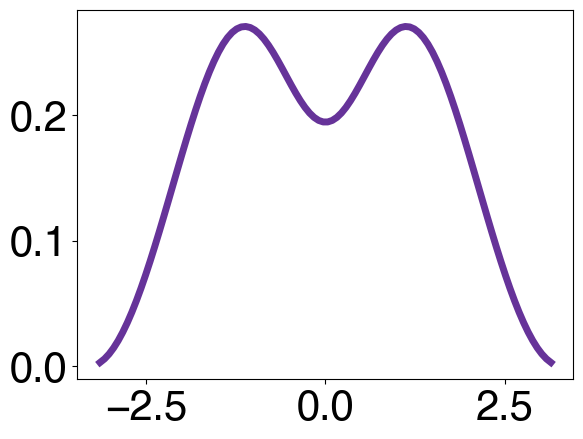

In [19]:
plt.plot(theta_y_arr, max_cost_arr, color='rebeccapurple', lw=5)
plt.show()

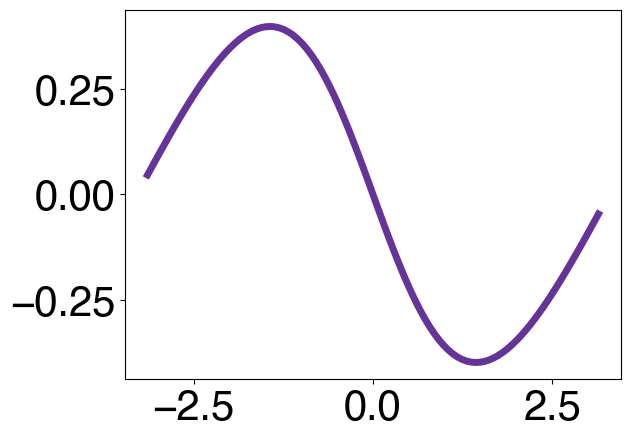

In [20]:
plt.plot(theta_y_arr, max_x_arr, color='rebeccapurple', lw=5)
plt.show()

In [ ]:
# Heatmap of maximum cost vs theta_z1 and theta_z2
theta_z1_grid, theta_z2_grid = np.meshgrid(theta_z1_arr, theta_z2_arr, indexing='ij')
fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(theta_z1_grid, theta_z2_grid, np.around(max_cost_arr, 4), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label="Cost")
ax.set_xlabel(r'$\theta_{z1}$')
ax.set_ylabel(r'$\theta_{z2}$')
for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
plt.tight_layout()
# plt.xlim(-2.3, 2.3)
plt.show()

In [ ]:
# Heatmap of maximum x vs theta_z1 and theta_z2
theta_z1_grid, theta_z2_grid = np.meshgrid(theta_z1_arr, theta_z2_arr, indexing='ij')
fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(theta_z1_grid, theta_z2_grid, np.abs(max_x_arr), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label="|x|")
ax.set_xlabel(r'$\theta_{z1}$')
ax.set_ylabel(r'$\theta_{z2}$')
for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
plt.tight_layout()
# plt.xlim(-2.3, 2.3)
plt.show()

# Floquet two layer one angle sweeping

In [62]:
Delta = 0.2
th_rel = "1.e-3"
th_dep = "1.e-3"
epsilon = "1.e-6"

path = f"/Users/sasankadowarah/Ultimate_QM_MM/VQA/infinite_ranged_modular/cost_vs_th_x_th_z/Delta_0.2/cost_vs_th_x_th_y_th_z_256_30_31"

x_initial_arr = np.linspace(-1, 1, 1000)

theta_x_arr = np.linspace(-1.5, 1.5, 256)
theta_y_arr = np.linspace(-1.5, 1.5, 30)
theta_z_arr = np.linspace(-1.5, 1.5, 31)

max_cost_vs_angles = 0.0

for x1_index in range(len(theta_x_arr)):
     b = x1_index
     os.chdir(path + f"/b{b}")
     print(f"b = {b}")
     try:
          cost_vs_angles = np.load(f"cost_vs_th_y_th_z_idxx_0.npy")
     except (FileNotFoundError, OSError):
          print(f"File for b={b} not found. Skipping.")
          continue
     # Maximum value of cost_vs_angles
     max_cost = np.nanmax(cost_vs_angles)
     if max_cost > max_cost_vs_angles:
          max_cost_vs_angles = max_cost
          max_cost_arr = cost_vs_angles

max_x_vs_angles = 0.0
best_x1_index = -1
best_x2_index = -1
for x1_index in range(len(theta_x_arr)):
     b = x1_index 
     os.chdir(path + f"/b{b}")
     print(f"b = {b}")
     try:
          x_vs_angles = np.load(f"x_ss_vs_th_y_th_z_idxx_{x1_index}.npy")     
     except (FileNotFoundError, OSError):
          print(f"File for b={b} not found. Skipping.")
          continue
     max_x = np.abs(np.nanmax(x_vs_angles))
     if max_x > max_x_vs_angles:
          max_x_vs_angles = max_x
          max_x_arr = x_vs_angles           
          best_x1_index = x1_index

b = 0
b = 1
File for b=1 not found. Skipping.
b = 2
File for b=2 not found. Skipping.
b = 3
File for b=3 not found. Skipping.
b = 4
File for b=4 not found. Skipping.
b = 5
File for b=5 not found. Skipping.
b = 6
File for b=6 not found. Skipping.
b = 7
File for b=7 not found. Skipping.
b = 8
File for b=8 not found. Skipping.
b = 9
File for b=9 not found. Skipping.
b = 10
File for b=10 not found. Skipping.
b = 11
File for b=11 not found. Skipping.
b = 12
File for b=12 not found. Skipping.
b = 13
File for b=13 not found. Skipping.
b = 14
File for b=14 not found. Skipping.
b = 15
File for b=15 not found. Skipping.
b = 16
File for b=16 not found. Skipping.
b = 17
File for b=17 not found. Skipping.
b = 18
File for b=18 not found. Skipping.
b = 19
File for b=19 not found. Skipping.
b = 20
File for b=20 not found. Skipping.
b = 21
File for b=21 not found. Skipping.
b = 22
File for b=22 not found. Skipping.
b = 23
File for b=23 not found. Skipping.
b = 24
File for b=24 not found. Skipping.
b = 

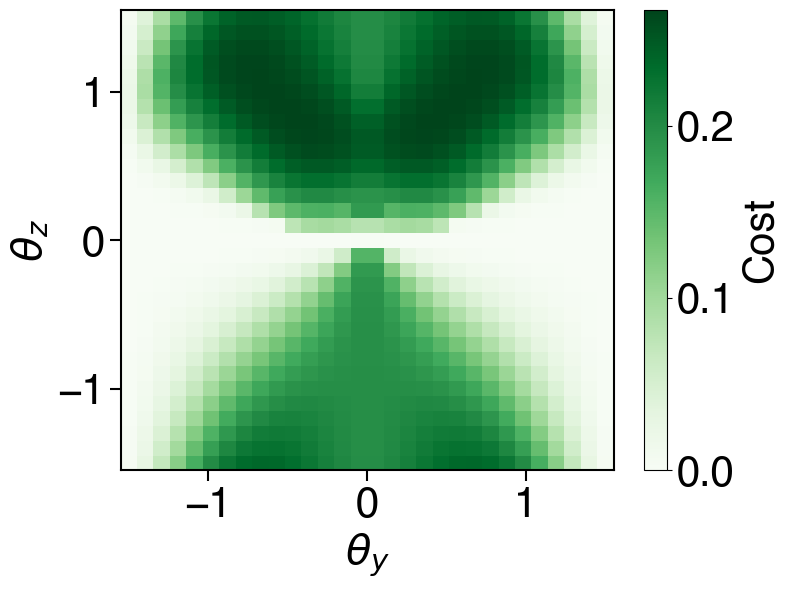

In [63]:
# Heatmap of maximum cost vs theta_z1 and theta_z2
theta_z1_grid, theta_z2_grid = np.meshgrid(theta_y_arr, theta_z_arr, indexing='ij')
fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(theta_z1_grid, theta_z2_grid, np.around(max_cost_arr, 4), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label="Cost")
ax.set_xlabel(r'$\theta_{y}$')
ax.set_ylabel(r'$\theta_{z}$')
for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
plt.tight_layout()
# plt.xlim(-2.3, 2.3)
plt.show()

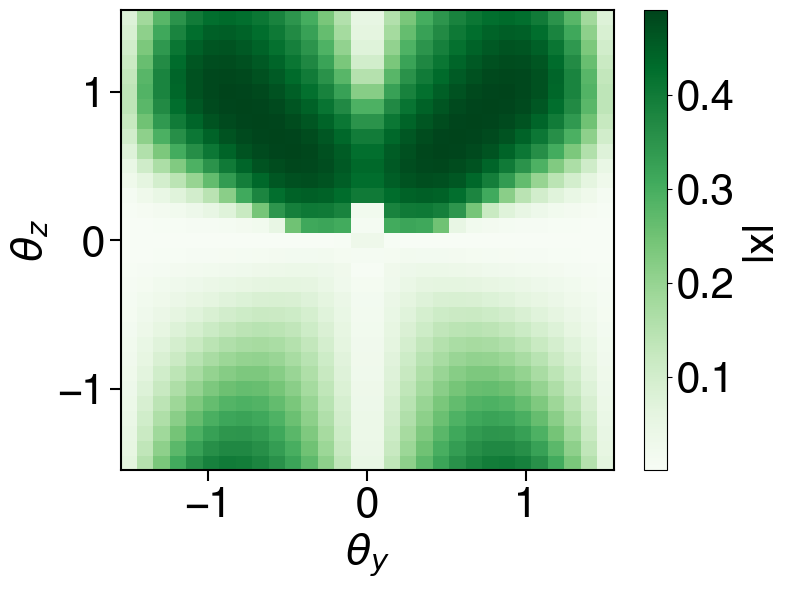

In [64]:
# Heatmap of maximum x vs theta_z1 and theta_z2
theta_z1_grid, theta_z2_grid = np.meshgrid(theta_y_arr, theta_z_arr, indexing='ij')
fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(theta_z1_grid, theta_z2_grid, np.abs(max_x_arr), shading='auto', cmap="Greens")
cbar = fig.colorbar(pcm, ax=ax, label="|x|")
ax.set_xlabel(r'$\theta_{y}$')
ax.set_ylabel(r'$\theta_{z}$')
for spine in ax.spines.values():
     spine.set_linewidth(1.5)
ax.tick_params(width=1.5, length=8, direction='out', which='major')
plt.tight_layout()
# plt.xlim(-2.3, 2.3)
plt.show()

In [65]:
print(f"Maximum cost found: {max_cost_vs_angles}")
print(f"Maximum |x| found: {max_x_vs_angles}")

Maximum cost found: 0.26697011479060745
Maximum |x| found: 0.490441378191809
